In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
data = pd.read_csv("california_house_prices.csv")
data.head(3)

,"longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value"
0,"-122.23,37.88,41,880,129,322,126,8.3252,NEAR B..."
1,"-122.22,37.86,21,7099,1106,2401,1138,8.3014,NE..."
2,"-122.24,37.85,52,1467,190,496,177,7.2574,NEAR ..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                   --------------  ----- 
 0   longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value  20640 non-null  object
dtypes: object(1)
memory usage: 161.4+ KB


In [6]:
data.dropna(inplace = True)

In [7]:
train_data = data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# from sklearn.model_selection import train_test_split
# X = data.drop(['median_house_value'], axis = 1)
# Y = data['median_house_value']
# train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

In [14]:
print(train_data.columns)


Index(['longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value'], dtype='object')


In [15]:
print(train_data.head())

  longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0  -122.23,37.88,41,880,129,322,126,8.3252,NEAR B...                                                                                     
1  -122.22,37.86,21,7099,1106,2401,1138,8.3014,NE...                                                                                     
2  -122.24,37.85,52,1467,190,496,177,7.2574,NEAR ...                                                                                     
3  -122.25,37.85,52,1274,235,558,219,5.6431,NEAR ...                                                                                     
4  -122.25,37.85,52,1627,280,565,259,3.8462,NEAR ...                                                                                     


<Axes: xlabel='longitude', ylabel='latitude'>

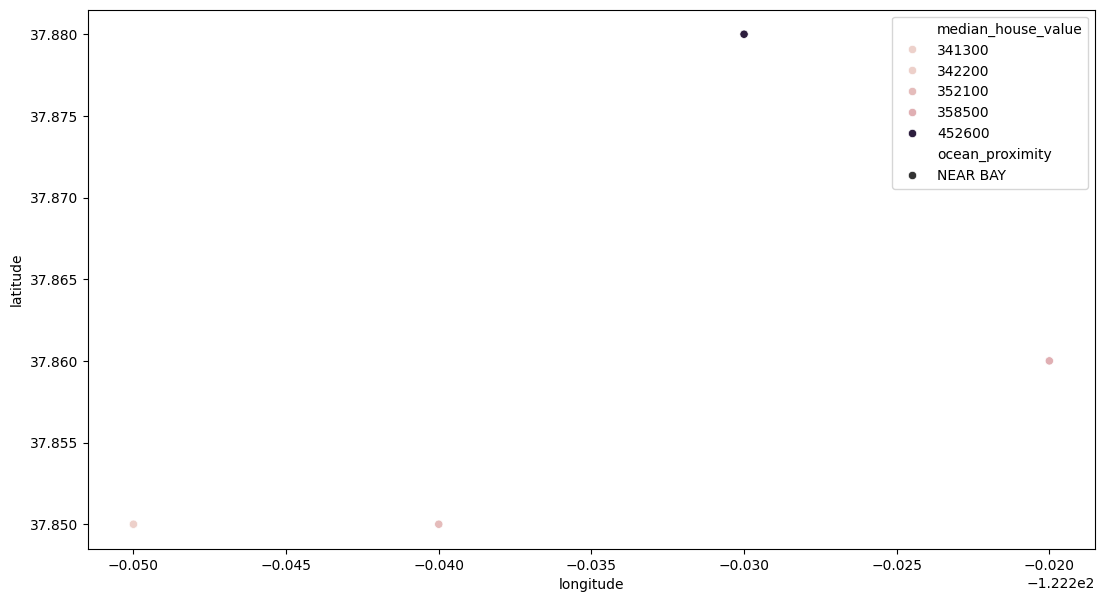

In [20]:
plt.figure(figsize=(13, 7))
sns.scatterplot(x='longitude', y='latitude',data=train_data, hue='median_house_value', style="ocean_proximity")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

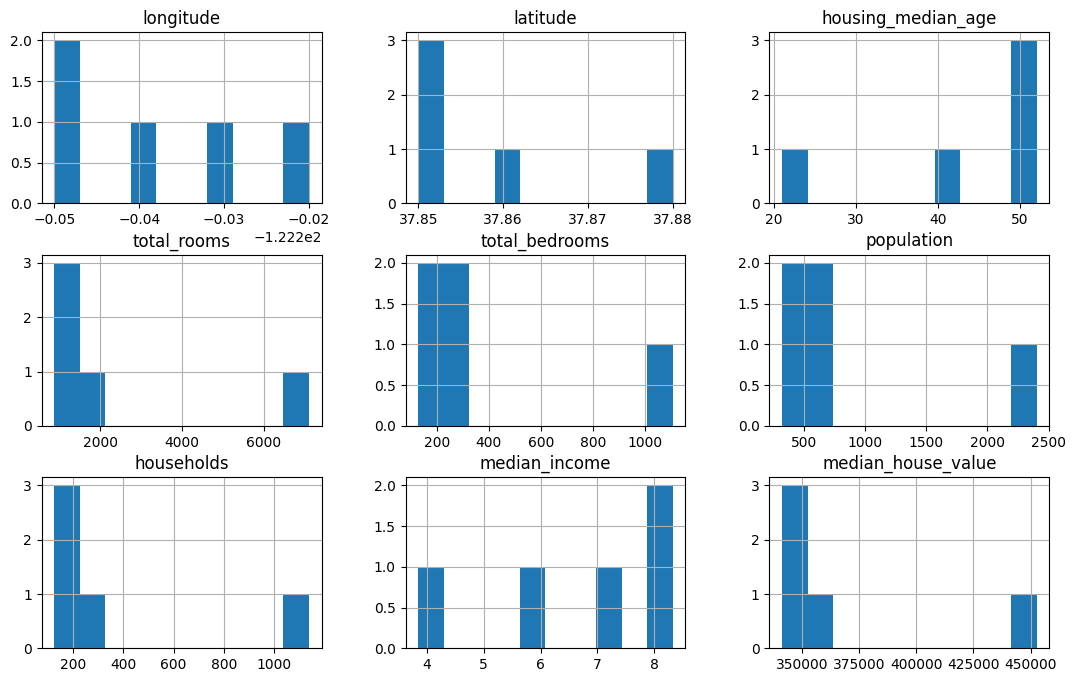

In [21]:
train_data.hist(figsize=(13, 8))

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5 non-null      float64
 1   latitude            5 non-null      float64
 2   housing_median_age  5 non-null      int64  
 3   total_rooms         5 non-null      int64  
 4   total_bedrooms      5 non-null      int64  
 5   population          5 non-null      int64  
 6   households          5 non-null      int64  
 7   median_income       5 non-null      float64
 8   ocean_proximity     5 non-null      object 
 9   median_house_value  5 non-null      int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 528.0+ bytes


In [23]:
train_data['total_rooms'] = train_data['total_rooms'] ** 0.33
train_data['households'] = np.sqrt(train_data['households'])
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'])
train_data['population'] = np.log(train_data['population'] + 10)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

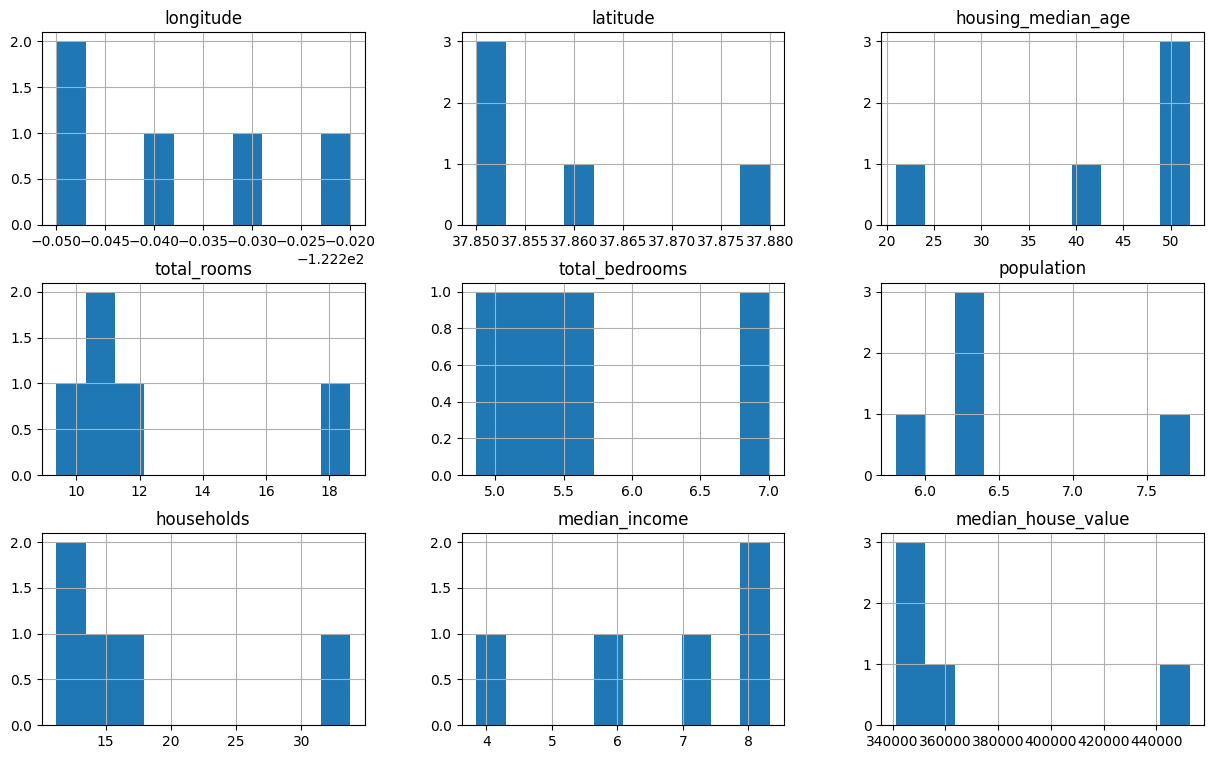

In [25]:
train_data.hist(figsize=(15, 9))

In [28]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
NEAR BAY    5
Name: count, dtype: int64

In [29]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY
0,-122.23,37.88,41,9.368699,4.859812,5.805135,11.224972,8.3252,452600,True
1,-122.22,37.86,21,18.659288,7.008505,7.787797,33.734256,8.3014,358500,True
2,-122.24,37.85,52,11.089755,5.247024,6.226537,13.304135,7.2574,352100,True
3,-122.25,37.85,52,10.585367,5.459586,6.342121,14.798649,5.6431,341300,True
4,-122.25,37.85,52,11.475137,5.634790,6.354370,16.093477,3.8462,342200,True


<Axes: >

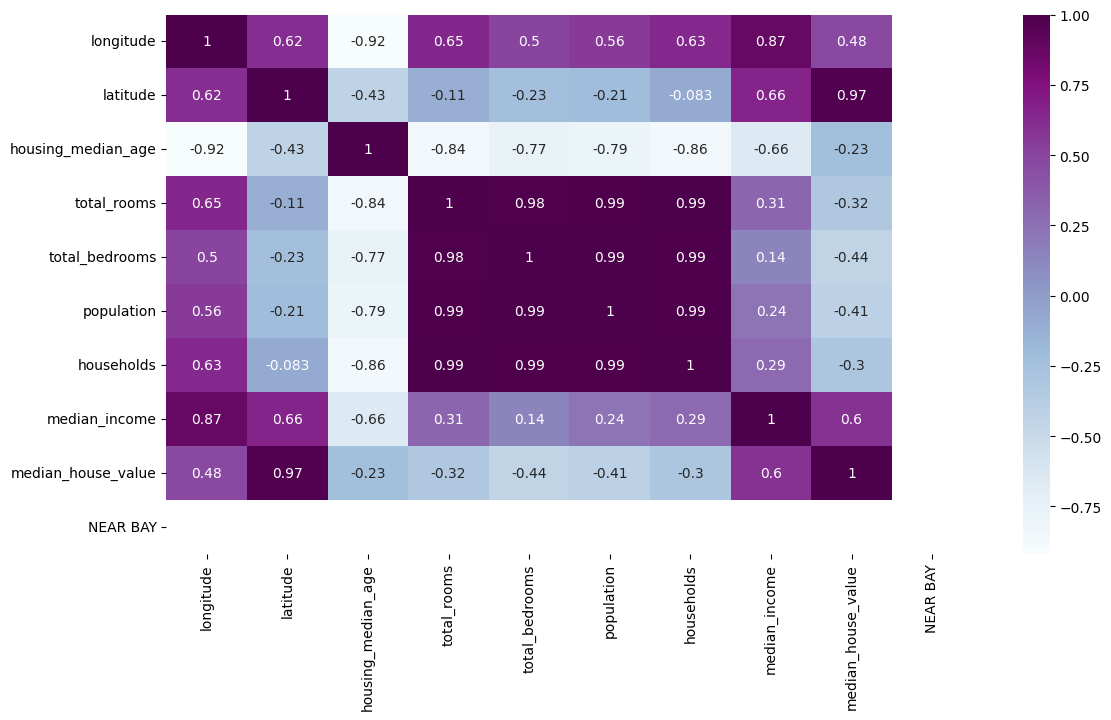

In [30]:
plt.figure(figsize=(13, 7))
sns.heatmap(train_data.corr(), annot=True, cmap='BuPu')

In [31]:
train_data['household_per_room'] = train_data['total_rooms'] / train_data['households']

<Axes: >

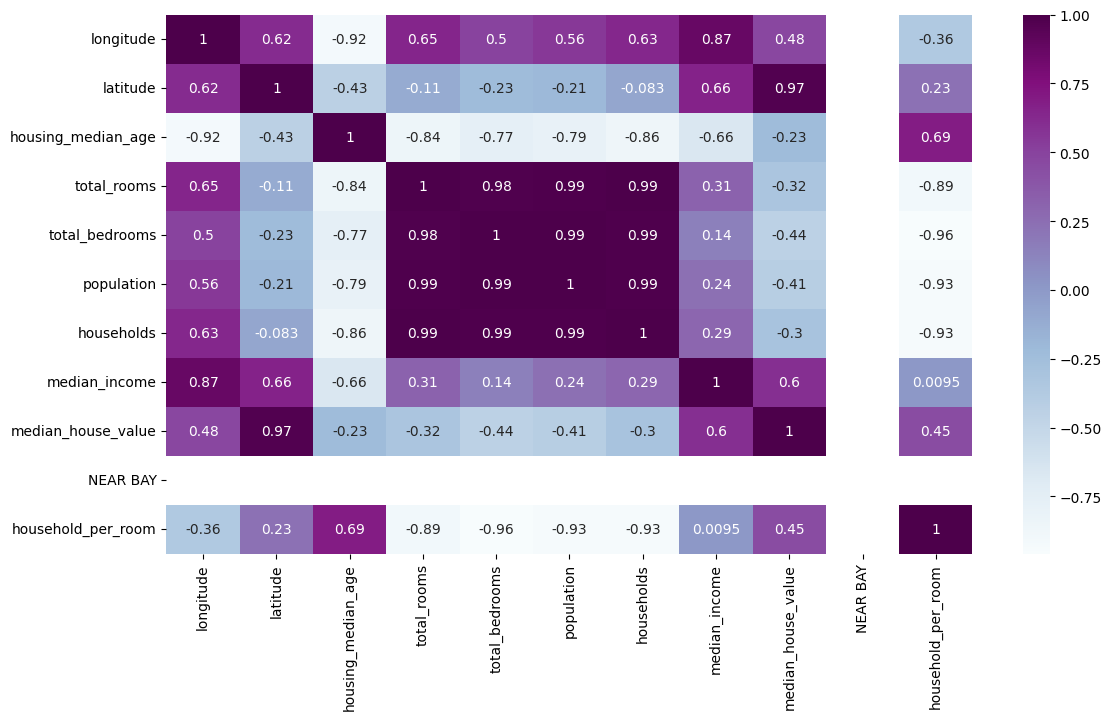

In [32]:
plt.figure(figsize=(13, 7))
sns.heatmap(train_data.corr(), annot=True, cmap='BuPu')

In [35]:
train_data.to_csv('feature_engineered_data.csv', index=False)